In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_data=pd.read_csv("C:/Users/hp/Documents/Machine Learning/Project/Project Files/heart.csv")

In [21]:
train_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
train_data.shape

(1025, 14)

In [24]:
#checking for duplicate values
train_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [25]:
#checking for missing values
train_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [26]:
#finding outliers
X=train_data.drop(["target"],axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [27]:
df_replace_nan = X.mask(X.sub(X.mean()).div(X.std()).abs().gt(3))

df_replace_nan.isnull().sum().sum() 

56

In [28]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())

df_replace_median.isnull().sum().sum() 

0

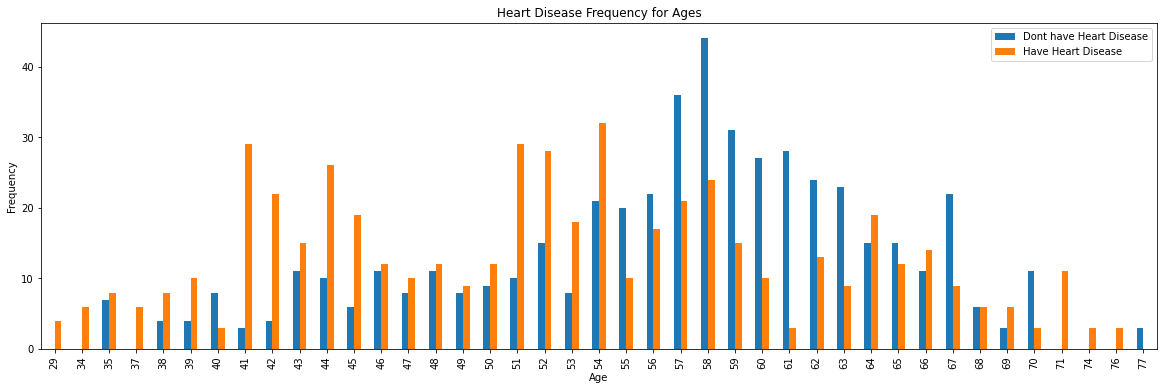

In [29]:
#Data Analysis : Correlation between heart disease and Age
pd.crosstab(train_data.age,train_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

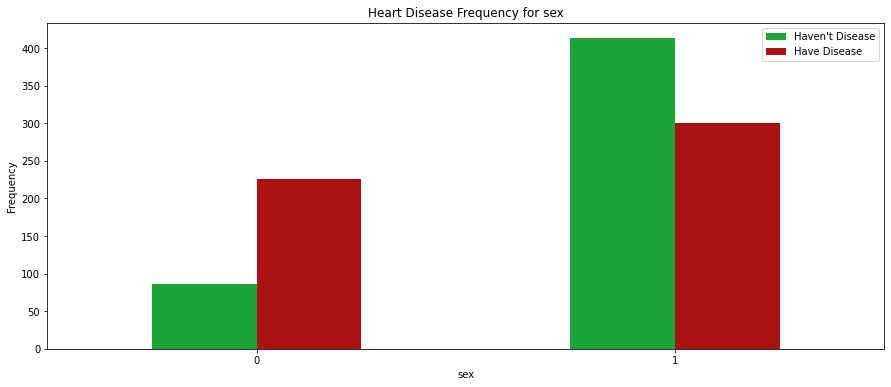

In [30]:
#Data Analysis : Correlation between heart disease and sex
# 0 - female
# 1 - male
pd.crosstab(train_data.sex,train_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

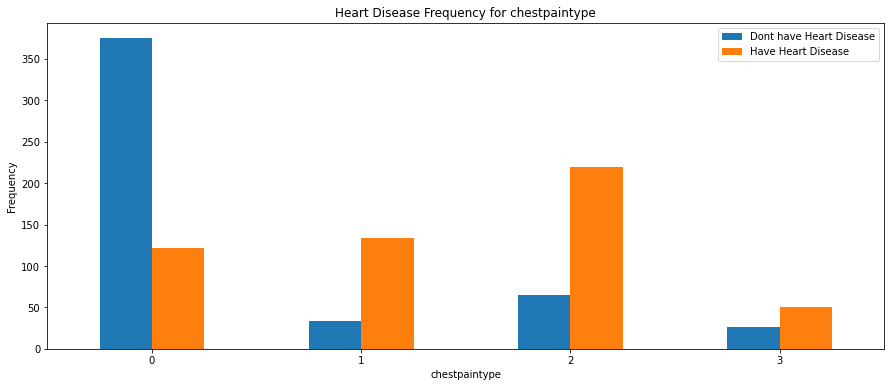

In [31]:
#Data Analysis : Correlation between heart disease and chestpaintype
pd.crosstab(train_data.cp,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chestpaintype')
plt.xlabel('chestpaintype')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndchestpaintype.png')
plt.show()

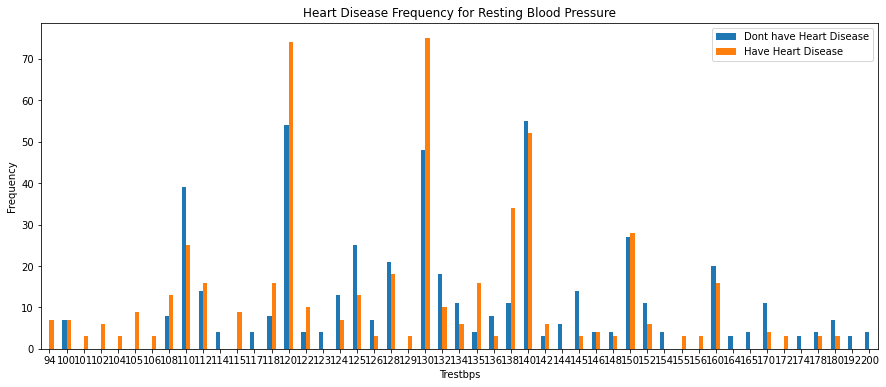

In [32]:
#Data Analysis : Correlation between heart disease and Resting Blood Pressure
pd.crosstab(train_data.trestbps,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Resting Blood Pressure')
plt.xlabel('Trestbps')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndtrestbps.png')
plt.show()

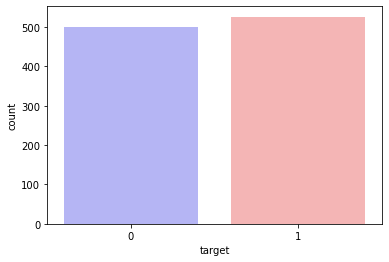

In [5]:
#to check for balancing of data
import seaborn as sns
sns.countplot(x="target", data=train_data, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(train_data[train_data.target == 0])
countHaveDisease = len(train_data[train_data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(train_data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(train_data.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:, train_data.columns != 'target'], train_data['target'], 
                 test_size = 0.3, random_state=66)

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

Train scores are: 
>10 0.853 (0.041)
Test scores are: 
>10 0.829 (0.065)
Train scores are: 
>50 0.898 (0.042)
Test scores are: 
>50 0.869 (0.062)
Train scores are: 
>100 0.920 (0.030)
Test scores are: 
>100 0.892 (0.058)
Train scores are: 
>200 0.943 (0.028)
Test scores are: 
>200 0.891 (0.058)
Train scores are: 
>500 0.971 (0.021)
Test scores are: 
>500 0.892 (0.062)
Train scores are: 
>700 0.972 (0.021)
Test scores are: 
>700 0.891 (0.064)
Train scores are: 
>1000 0.974 (0.019)
Test scores are: 
>1000 0.892 (0.061)


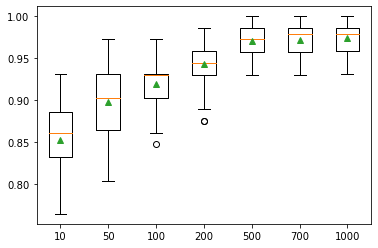

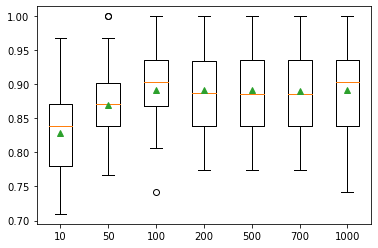

In [35]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    n_trees = [10, 50, 100, 200, 500, 700, 1000]
    for n in n_trees:
            models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    # summarize the performance along the way
    print("Train scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
# plot model performance for comparison

pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()

>0.100 0.853 (0.060)
>0.200 0.857 (0.060)
>0.300 0.857 (0.065)
>0.400 0.859 (0.061)
>0.500 0.863 (0.056)
>0.600 0.872 (0.062)
>0.700 0.879 (0.065)
>0.800 0.875 (0.057)
>0.900 0.872 (0.046)
>1.000 0.869 (0.062)
>1.100 0.877 (0.051)
>1.200 0.877 (0.056)
>1.300 0.884 (0.052)
>1.400 0.881 (0.040)
>1.500 0.868 (0.060)
>1.600 0.864 (0.057)
>1.700 0.862 (0.050)
>1.800 0.852 (0.068)
>1.900 0.824 (0.071)
>2.000 0.703 (0.079)


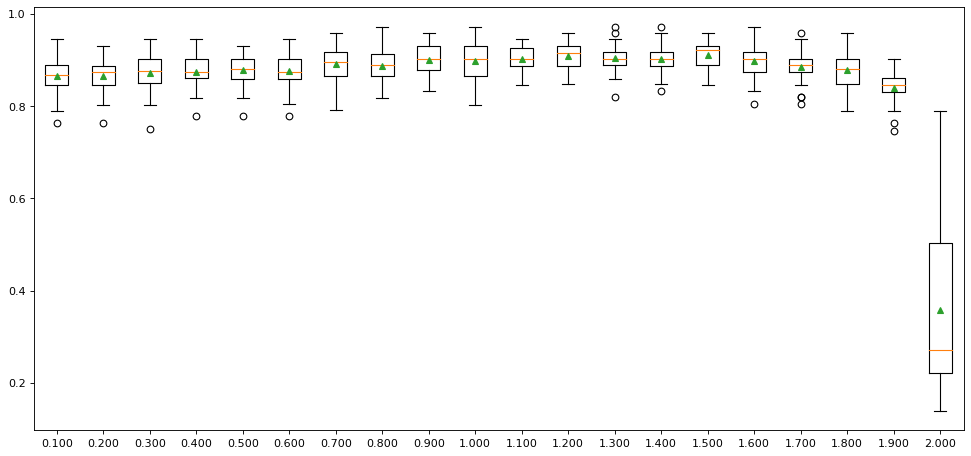

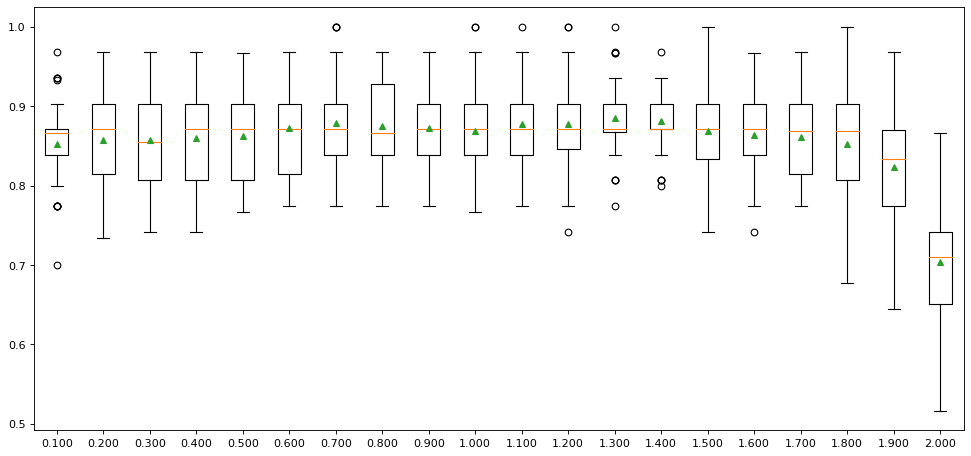

In [36]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from numpy import arange

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    #summarize the performance along the way
    #print("Train scores are: ")
    #print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    #print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
    
# plot model performance for comparison
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()


Train scores are: 
>DecisionTreeClassifier() 0.978 (0.021)
Test scores are: 
>DecisionTreeClassifier() 0.867 (0.073)
Train scores are: 
>SVC(kernel='linear', probability=True) 0.692 (0.046)
Test scores are: 
>SVC(kernel='linear', probability=True) 0.742 (0.120)
Train scores are: 
>SVC(probability=True) 0.570 (0.062)
Test scores are: 
>SVC(probability=True) 0.637 (0.091)
Train scores are: 
>LogisticRegression() 0.856 (0.044)
Test scores are: 
>LogisticRegression() 0.819 (0.061)


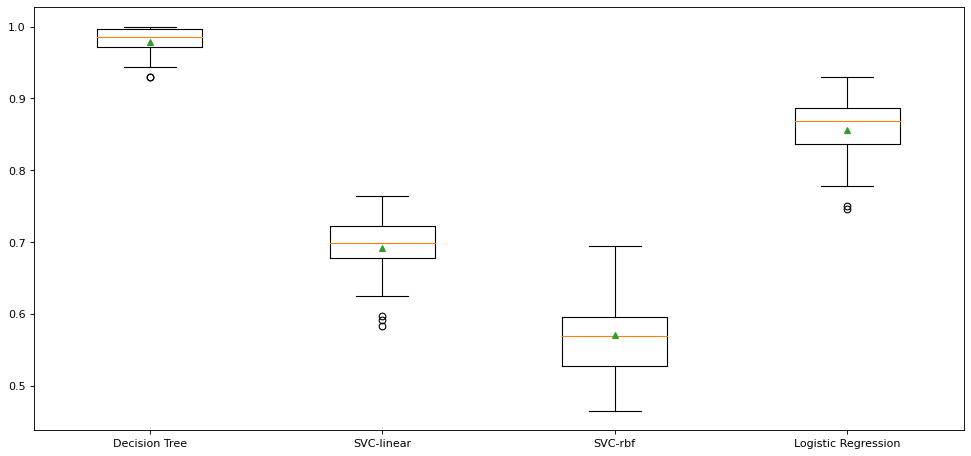

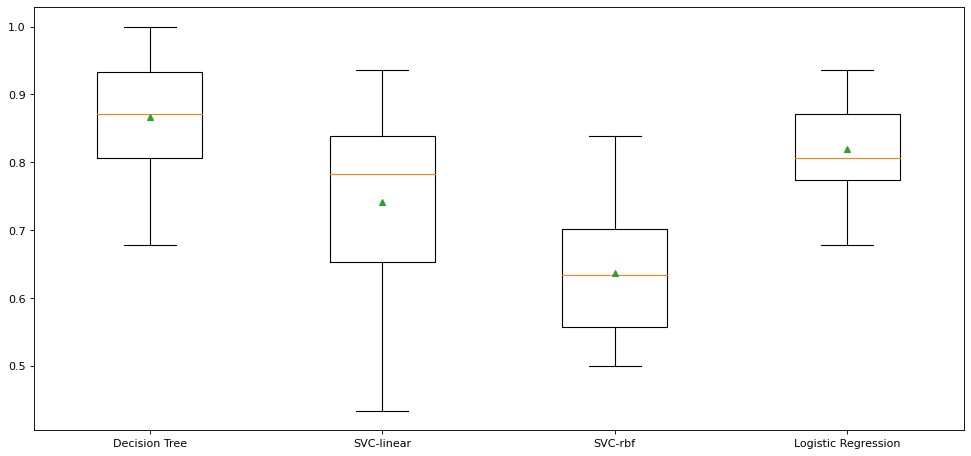

In [37]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    svcl=SVC(probability=True, kernel='linear')
    svcr=SVC(probability=True, kernel='rbf')
    dt=DecisionTreeClassifier()
    lr=LogisticRegression()
    bestimator=[dt,svcl,svcr,lr]
    for i in bestimator:
            models[str(i)] = AdaBoostClassifier(base_estimator=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    # summarize the performance along the way
    print("Train scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
# plot model performance for comparison
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_train, labels=['Decision Tree','SVC-linear','SVC-rbf','Logistic Regression'], showmeans=True)
pyplot.show()
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_test, labels=['Decision Tree','SVC-linear','SVC-rbf','Logistic Regression'], showmeans=True)
pyplot.show()

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [40]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada_boost = AdaBoostClassifier()

# Train Adaboost Classifer
ada_boost.fit(x_train, y_train)


print_score(ada_boost, x_train, y_train, x_test, y_test, train=True)
print_score(ada_boost, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 92.47%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.922414    0.926829  0.924686    0.924622      0.924686
recall       0.922414    0.926829  0.924686    0.924622      0.924686
f1-score     0.922414    0.926829  0.924686    0.924622      0.924686
support    348.000000  369.000000  0.924686  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[321  27]
 [ 27 342]]

Test Result:
Accuracy Score: 87.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.924812    0.840000  0.876623    0.882406      0.881580
recall       0.814570    0.936306  0.876623    0.875438      0.876623
f1-score     0.866197    0.885542  0.876623    0.875870      0.876058
support    151.000000  157.000000  0.876623  308.000000    308.

In [39]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada_boost = AdaBoostClassifier(n_estimators=700, learning_rate=0.1, random_state=0)

# Train Adaboost Classifer
ada_boost.fit(x_train, y_train)


print_score(ada_boost, x_train, y_train, x_test, y_test, train=True)
print_score(ada_boost, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 92.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.920228    0.931694  0.926081    0.925961      0.926129
recall       0.928161    0.924119  0.926081    0.926140      0.926081
f1-score     0.924177    0.927891  0.926081    0.926034      0.926089
support    348.000000  369.000000  0.926081  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[323  25]
 [ 28 341]]

Test Result:
Accuracy Score: 89.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921429    0.869048  0.892857    0.895238      0.894728
recall       0.854305    0.929936  0.892857    0.892120      0.892857
f1-score     0.886598    0.898462  0.892857    0.892530      0.892645
support    151.000000  157.000000  0.892857  308.000000    308.